# Feature Permutation 

Example to run the Breiman permutation test for feature importance calculation. 

In [11]:
from methods.feature_permutation import FeaturePermutation
import numpy as np 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

Create some random data X and a target y variable that is a combination of some predictors in X plus Gaussian noise: 

In [12]:
np.random.seed(10) 

N = 100
X = np.random.rand(N,5)
y = 3*X[:,3] + 6*X[:,1] + np.random.normal(0,0.5,N) + 5
features = ["f"+str(i) for i in range(X.shape[1])]

We fit a linear regression model to our data: 

In [3]:
model = LinearRegression().fit(X, y)

Let us fit the permutation method for ranking features based on how much the error increase when we randomize a given predictor:  

In [13]:
config = {
    "model": model,
    "X": X, 
    "y": y,
    "features":features,
    "Np": 100,
    "cost":"mse"
}

In [14]:
fp = FeaturePermutation(config)
fi = fp.fit()

As expected, by construction, the first and third features are the most important while the remaining three features are essentially irrelevant since FI is close to 1. 

In [15]:
print(fi["RESULT"])

[(40.18629227500342, 'f1'), (7.975605217486914, 'f3'), (1.0460121874897743, 'f4'), (1.0045605174662458, 'f2'), (1.0000777213972811, 'f0')]


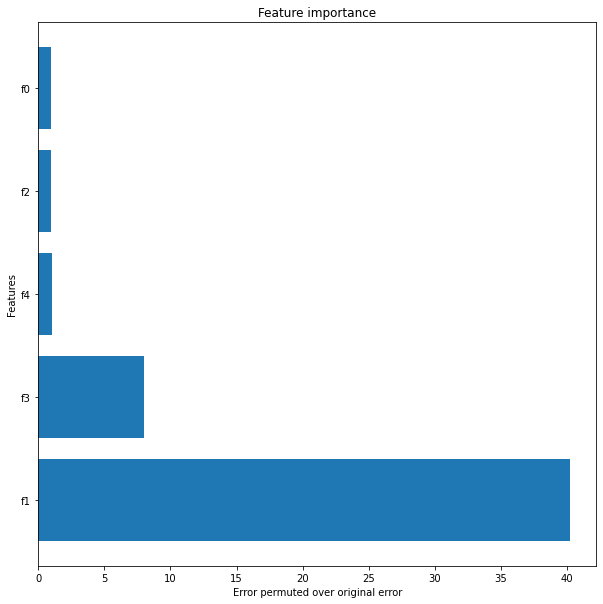

In [16]:
fp.plot(fi["RESULT"])

We can also call the run_all() method if we want to fit the permutation algorithm and show the results at the same time:

Feature  f0 is ranked number  4  with a score of  1.0000777213972811 +/- 0.0035051019186748775
Feature  f1 is ranked number  0  with a score of  40.18629227500342 +/- 4.226554378463681
Feature  f2 is ranked number  3  with a score of  1.0045605174662458 +/- 0.00916692063328021
Feature  f3 is ranked number  1  with a score of  7.975605217486914 +/- 0.8543605082674613
Feature  f4 is ranked number  2  with a score of  1.0460121874897743 +/- 0.03250728916144764


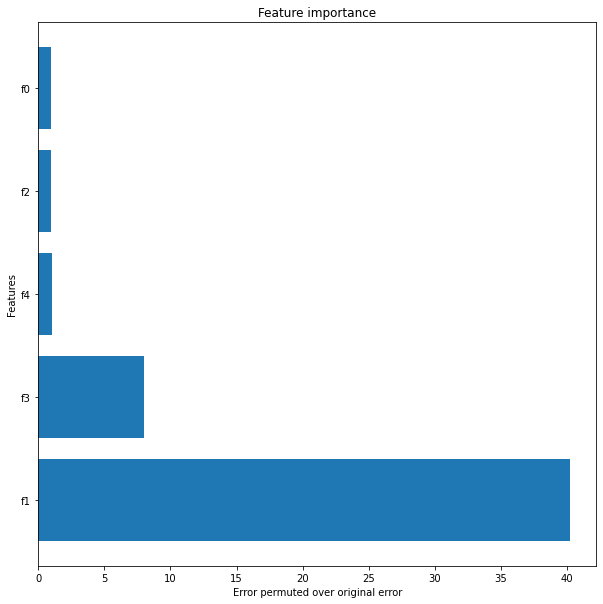

In [17]:
fp.run_all()

Method performance: 

In [18]:
%timeit fp.fit()

109 ms ± 4.27 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
